In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import mixture

In [2]:
data = 'data/penguins.csv'
df = pd.read_csv(data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
df['sex'].fillna('female')

0        male
1      female
2      female
3      female
4      female
        ...  
339      male
340    female
341      male
342      male
343    female
Name: sex, Length: 344, dtype: object

In [4]:
df['sex'] = df['sex'].fillna('female')

In [5]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(value = df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(value = df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
class_le = LabelEncoder()

In [8]:
df['species'] = class_le.fit_transform(df['species'].values)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,female
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,1,Dream,55.80000,19.80000,207.000000,4000.000000,male
340,1,Dream,43.50000,18.10000,202.000000,3400.000000,female
341,1,Dream,49.60000,18.20000,193.000000,3775.000000,male
342,1,Dream,50.80000,19.00000,210.000000,4100.000000,male


In [9]:
df = pd.get_dummies(df,prefix=['island'], columns = ['island'], drop_first=True)

In [10]:
df = pd.get_dummies(df,prefix=['sex'], columns = ['sex'], drop_first=True)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,0
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...,...
339,1,55.80000,19.80000,207.000000,4000.000000,1,0,1
340,1,43.50000,18.10000,202.000000,3400.000000,1,0,0
341,1,49.60000,18.20000,193.000000,3775.000000,1,0,1
342,1,50.80000,19.00000,210.000000,4100.000000,1,0,1


In [11]:
y = df['species']
X = df.drop(['species'], axis = 1)

In [12]:
model = LDA(n_components = 2)

In [13]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [14]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.992 (0.015)


In [16]:
data = model.fit_transform(X,y)

In [17]:
data

array([[-4.86147445e+00, -2.27484502e+00],
       [-2.66128367e+00, -1.38798117e+00],
       [-3.10472779e+00, -5.16908668e-01],
       [-2.67793181e-01, -7.58774492e-02],
       [-4.38155134e+00, -2.06457674e+00],
       [-5.81809357e+00, -2.01089661e+00],
       [-3.71333876e+00, -1.42014778e+00],
       [-3.13459266e+00, -3.12560749e+00],
       [-3.55232733e+00, -3.18875663e+00],
       [-3.84125031e+00, -6.89332439e-01],
       [-3.24585453e+00, -1.58835336e+00],
       [-3.36376662e+00, -1.95633159e+00],
       [-3.87306103e+00, -1.42842572e-01],
       [-6.08543682e+00, -2.40465277e+00],
       [-4.90045652e+00, -4.60370500e+00],
       [-3.45880417e+00, -2.41599819e+00],
       [-3.79655022e+00, -1.29220715e+00],
       [-3.86239722e+00, -1.58641455e+00],
       [-4.75027624e+00, -2.88467529e+00],
       [-4.91930413e+00,  1.49603106e-01],
       [-3.96003365e+00, -1.69424132e+00],
       [-4.10072551e+00, -2.78368361e+00],
       [-3.04441116e+00, -2.82529552e+00],
       [-2.

In [18]:
labels = model.predict(X)

In [19]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
dataset_df = pd.DataFrame(data)

In [21]:
dataset_df

,0,1
0,-4.861474,-2.274845
1,-2.661284,-1.387981
2,-3.104728,-0.516909
3,-0.267793,-0.075877
4,-4.381551,-2.064577
...,...,...
339,-1.918826,5.628029
340,-2.176034,2.113018
341,-2.581992,3.330230
342,-1.263694,3.493135


In [22]:
dataset_df['LDA1'] = data[:, 0]

In [23]:
dataset_df['LDA2'] = data[:, 1]

In [24]:
dataset_df = dataset_df.drop(dataset_df.columns[[0]], axis=1)

In [25]:
dataset_df = dataset_df.drop(dataset_df.columns[[0]], axis=1)

In [26]:
dataset_df

,LDA1,LDA2
0,-4.861474,-2.274845
1,-2.661284,-1.387981
2,-3.104728,-0.516909
3,-0.267793,-0.075877
4,-4.381551,-2.064577
...,...,...
339,-1.918826,5.628029
340,-2.176034,2.113018
341,-2.581992,3.330230
342,-1.263694,3.493135


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


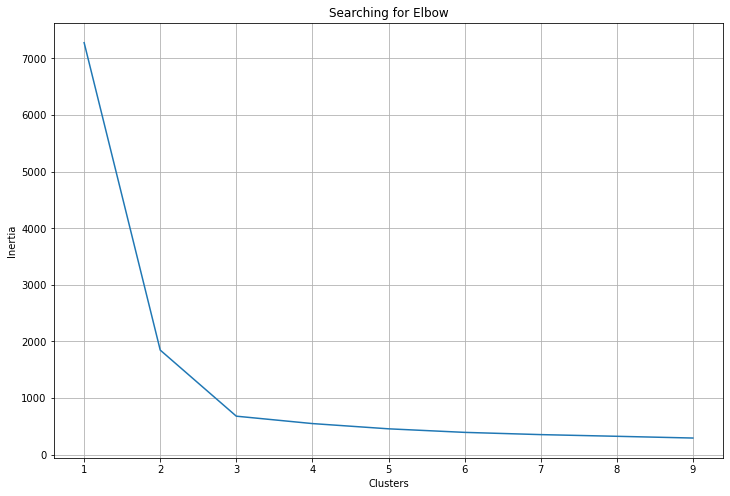

In [27]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset_df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6900351475259805
For n_clusters = 3 The average silhouette_score is : 0.6960360786972125
For n_clusters = 4 The average silhouette_score is : 0.560188256766422
For n_clusters = 5 The average silhouette_score is : 0.5597290287199452


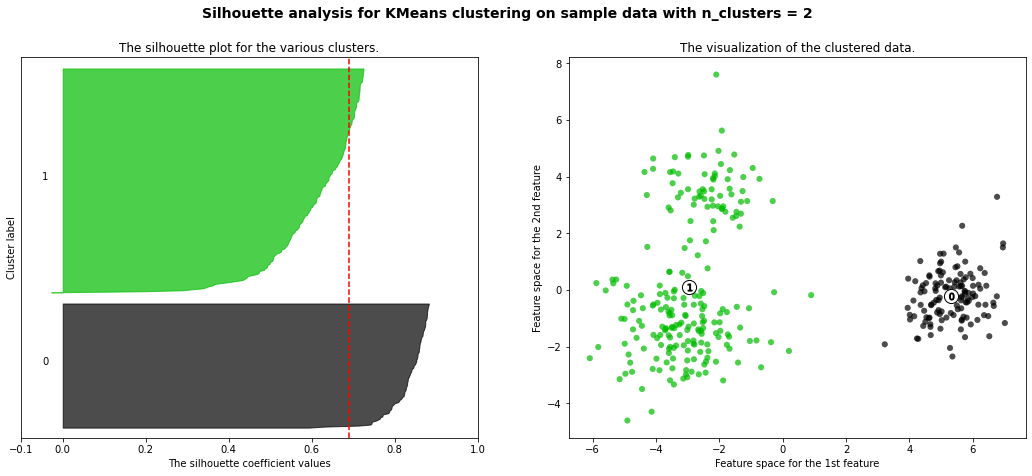

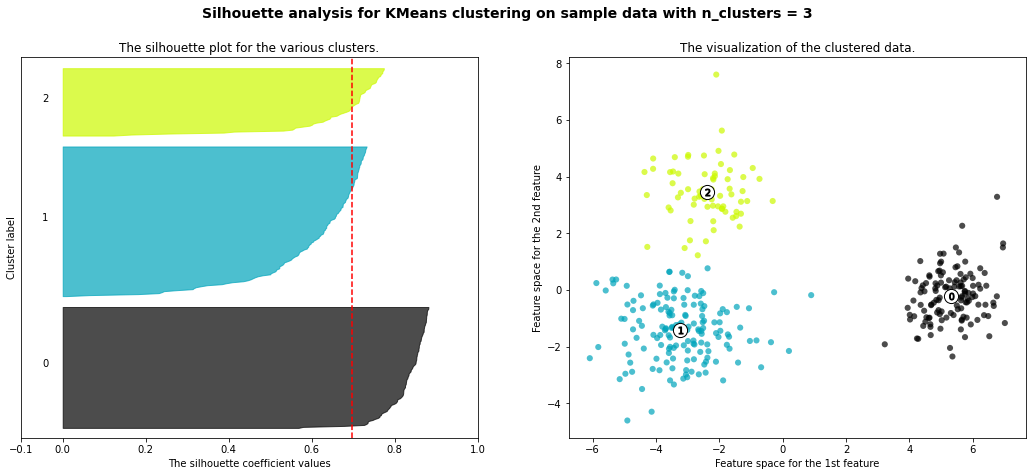

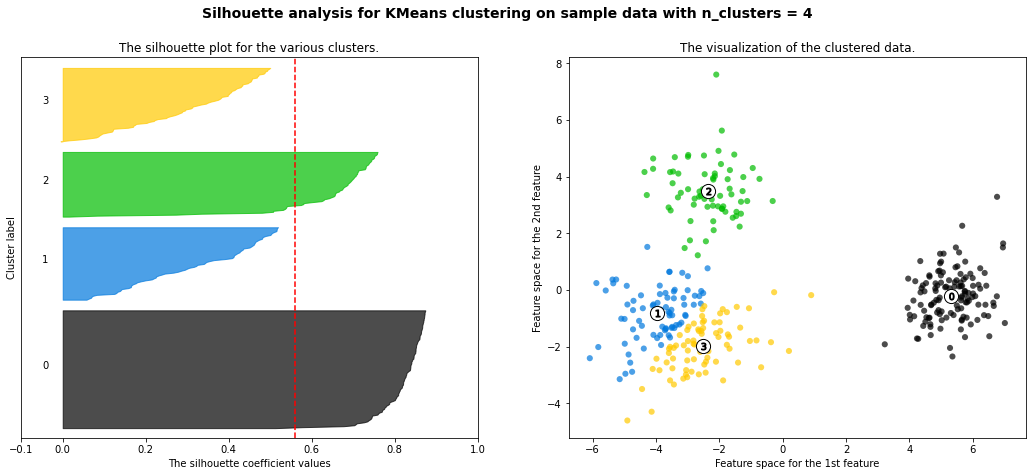

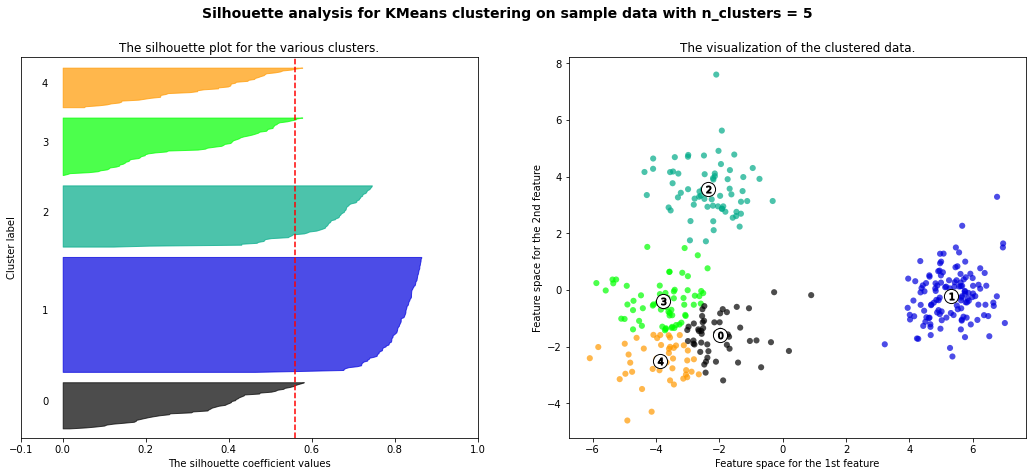

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dataset_df['LDA1'], dataset_df['LDA2'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [29]:
km = KMeans(n_clusters= 3, random_state=10, max_iter = 600, tol = 1)

In [30]:
model = km.fit(dataset_df)

In [31]:
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [32]:
dataset_df['labels'] = cluster_labels
dataset_df

,LDA1,LDA2,labels
0,-4.861474,-2.274845,1
1,-2.661284,-1.387981,1
2,-3.104728,-0.516909,1
3,-0.267793,-0.075877,1
4,-4.381551,-2.064577,1
...,...,...,...
339,-1.918826,5.628029,2
340,-2.176034,2.113018,2
341,-2.581992,3.330230,2
342,-1.263694,3.493135,2


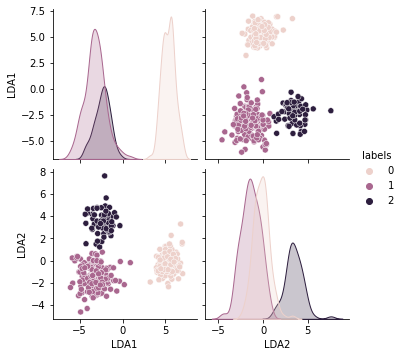

In [33]:
sns.pairplot(dataset_df, hue = 'labels')
plt.show()

In [34]:
dataset_df = dataset_df.drop(['labels'], axis = 1)
dataset_df

,LDA1,LDA2
0,-4.861474,-2.274845
1,-2.661284,-1.387981
2,-3.104728,-0.516909
3,-0.267793,-0.075877
4,-4.381551,-2.064577
...,...,...
339,-1.918826,5.628029
340,-2.176034,2.113018
341,-2.581992,3.330230
342,-1.263694,3.493135


For n_components = 2 The average silhouette_score is : 0.6900351475259805
For n_components = 3 The average silhouette_score is : 0.6955623642364988
For n_components = 4 The average silhouette_score is : 0.554972603689931
For n_components = 5 The average silhouette_score is : 0.3811840441384907


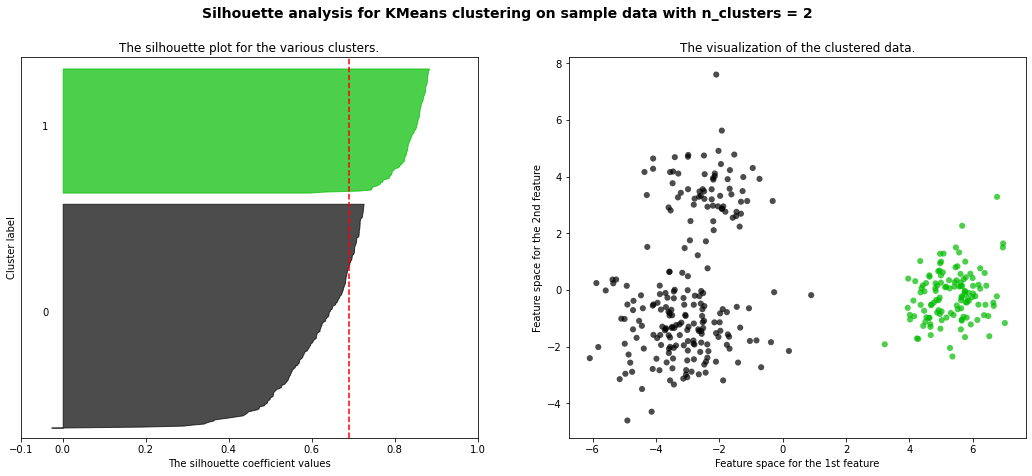

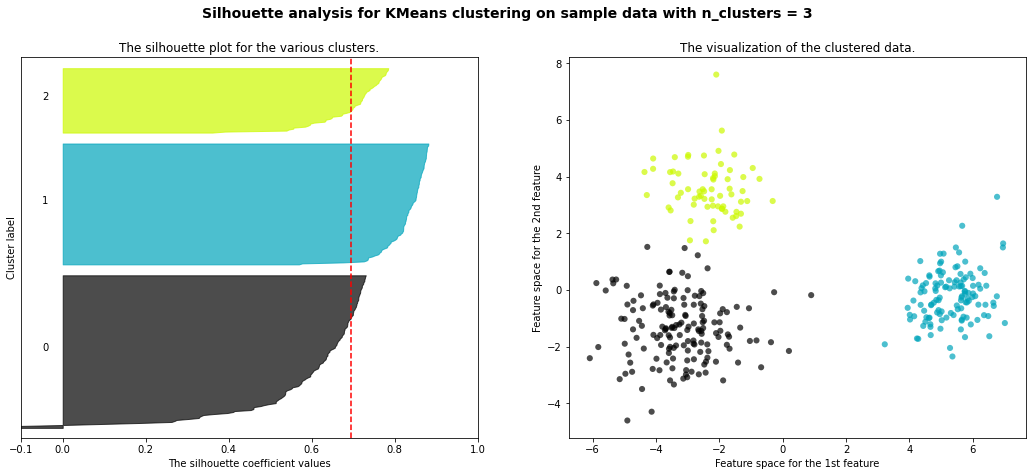

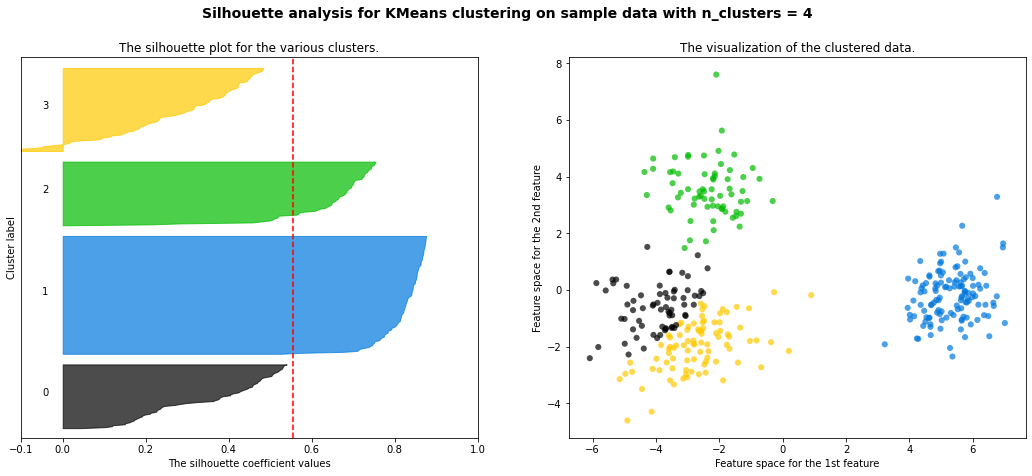

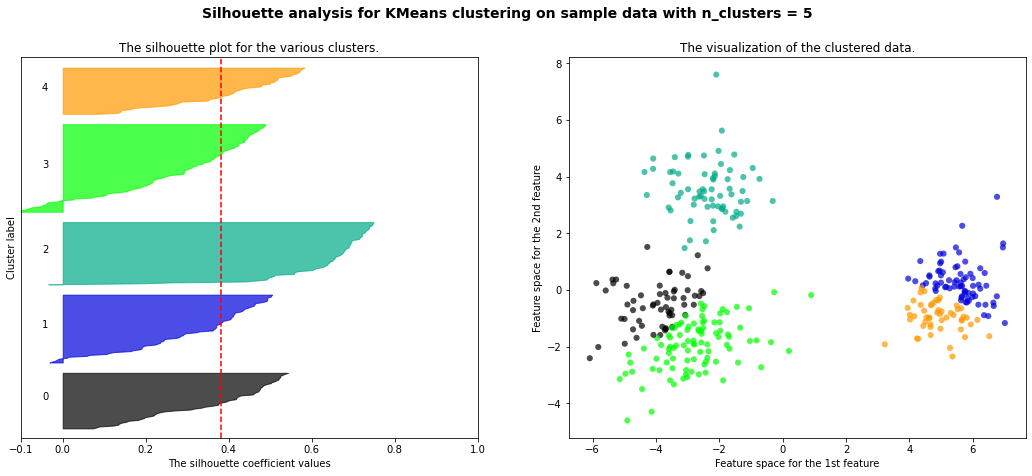

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset_df) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )
    cluster_labels = gmm.fit_predict(dataset_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset_df, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset_df, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        dataset_df['LDA1'], dataset_df['LDA2'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [42]:
    gmm = mixture.GaussianMixture(
    n_components=3, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )

In [43]:
model = gmm.fit(dataset_df)

In [44]:
labels = gmm.predict(dataset_df)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [45]:
dataset_df['labels'] = labels
dataset_df

,LDA1,LDA2,labels
0,-4.861474,-2.274845,0
1,-2.661284,-1.387981,0
2,-3.104728,-0.516909,0
3,-0.267793,-0.075877,0
4,-4.381551,-2.064577,0
...,...,...,...
339,-1.918826,5.628029,2
340,-2.176034,2.113018,2
341,-2.581992,3.330230,2
342,-1.263694,3.493135,2


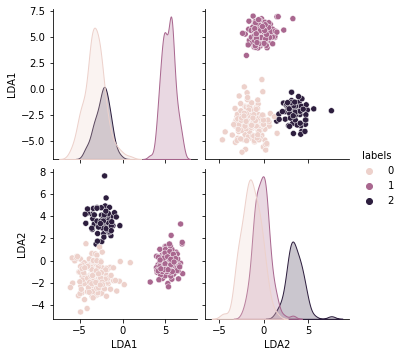

In [46]:
sns.pairplot(dataset_df, hue = 'labels')
plt.show()